In [170]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [171]:
#read the data
data = pd.read_csv('vermont.csv', header='infer')
data.shape

(283285, 23)

In [172]:
#all the missing values for each column
pd.isnull(data).sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                694
county_name                 705
county_fips                 705
fine_grained_location       347
police_department             0
driver_gender              1712
driver_age_raw             1171
driver_age                 1286
driver_race_raw            3984
driver_race                4817
violation_raw              2178
violation                  2178
search_conducted              0
search_type_raw            2240
search_type              279866
contraband_found             34
stop_outcome               2325
is_arrested                   0
officer_id                   12
dtype: int64

In [173]:
# Location is needed to build an accurate model so all missing data will be dropped
data = data.dropna(subset = ['county_name'])

# Drivers gender is also needed so will drop records without gender
data = data.dropna(subset = ['driver_gender'])

# Drivers race is also needed so will drop records without race
data = data.dropna(subset = ['driver_race'])

# Violation is also needed so will drop records without violation
data = data.dropna(subset = ['violation'])

# Search Type Raw, Contraband Found, Stop Outcome and Officer ID only include 500 records for missing values so we will drop these fields too
data = data.dropna(subset = ['search_type_raw'])
data = data.dropna(subset = ['contraband_found'])
data = data.dropna(subset = ['stop_outcome'])
data = data.dropna(subset = ['officer_id'])

# Drivers age is important but to avoid dropping further data we will fill this in with average age
data['driver_age_raw']=data['driver_age_raw'].astype(float) #convert data from strings to floats
mean = data['driver_age_raw'].mean()
print("mean=", mean)
data['driver_age_raw'].fillna(mean, inplace=True)
data['driver_age'].fillna(int(mean),inplace=True)
pd.isnull(data).sum()

mean= 38.80050030354674


id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                  0
county_name                   0
county_fips                   0
fine_grained_location       202
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                    0
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw               0
search_type              270902
contraband_found              0
stop_outcome                  0
is_arrested                   0
officer_id                    0
dtype: int64

In [174]:
data.shape

(274201, 23)

In [175]:
features_X = data.drop(['id','state','stop_date','stop_time','fine_grained_location','driver_age','violation_raw','search_type','officer_id','county_name','driver_race','is_arrested'], axis = 1)
features_X

classLabel_Y = data['is_arrested']

In [176]:
features_X.head()

,location_raw,county_fips,police_department,driver_gender,driver_age_raw,driver_race_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome
0,East Montpelier,50023.0,MIDDLESEX VSP,M,22.0,White,Moving violation,False,No Search Conducted,False,Citation
3,Whiting,50001.0,NEW HAVEN VSP,F,18.0,White,Moving violation,False,No Search Conducted,False,Arrest for Violation
4,Hardwick,50005.0,ROYALTON VSP,M,18.0,White,Moving violation,False,No Search Conducted,False,Written Warning
5,Hardwick,50005.0,ROYALTON VSP,F,20.0,White,Equipment,False,No Search Conducted,False,Written Warning
8,Rochester,50027.0,ROCKINGHAM VSP,M,24.0,Black,Moving violation,False,No Search Conducted,False,Written Warning


In [177]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Converting all labels to numbers
features_X['location_raw']= label_encoder.fit_transform(features_X['location_raw']) 
features_X['county_fips']= label_encoder.fit_transform(features_X['county_fips'])
features_X['police_department']= label_encoder.fit_transform(features_X['police_department'])
features_X['driver_gender']= label_encoder.fit_transform(features_X['driver_gender'])
features_X['driver_race_raw']= label_encoder.fit_transform(features_X['driver_race_raw'])
features_X['violation']= label_encoder.fit_transform(features_X['violation'])
features_X['search_type_raw']= label_encoder.fit_transform(features_X['search_type_raw'])
features_X['contraband_found']= label_encoder.fit_transform(features_X['contraband_found'])
features_X['stop_outcome']= label_encoder.fit_transform(features_X['stop_outcome'])
#features_X['is_arrested']= label_encoder.fit_transform(features_X['is_arrested'])


features_X.head()

,location_raw,county_fips,police_department,driver_gender,driver_age_raw,driver_race_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome
0,88,11,3,1,22.0,4,2,False,3,0,1
3,324,0,4,0,18.0,4,2,False,3,0,0
4,128,2,6,1,18.0,4,2,False,3,0,4
5,128,2,6,0,20.0,4,1,False,3,0,4
8,234,13,5,1,24.0,1,2,False,3,0,4


In [178]:
# Scaling Our Data
scaler = StandardScaler()
features_X = scaler.fit_transform(features_X)
features_X = pd.DataFrame(features_X)
features_X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.807634,0.795970,-0.835090,0.754259,-1.081152,0.205937,0.338499,-0.110353,0.098061,-0.098390,-1.225644
1,1.646062,-1.611749,-0.574254,-1.325804,-1.338561,0.205937,0.338499,-0.110353,0.098061,-0.098390,-1.900430
2,-0.391753,-1.173982,-0.052583,0.754259,-1.338561,0.205937,0.338499,-0.110353,0.098061,-0.098390,0.798712
3,-0.391753,-1.173982,-0.052583,-1.325804,-1.209857,0.205937,-1.855386,-0.110353,0.098061,-0.098390,0.798712
4,0.710331,1.233738,-0.313418,0.754259,-0.952447,-4.499865,0.338499,-0.110353,0.098061,-0.098390,0.798712
...,...,...,...,...,...,...,...,...,...,...,...
274196,-0.381356,1.233738,-0.052583,0.754259,2.265171,0.205937,0.338499,-0.110353,0.098061,-0.098390,0.798712
274197,-0.370959,1.233738,-0.052583,-1.325804,-0.630685,0.205937,0.338499,9.061810,-10.413456,10.163592,-1.900430
274198,-1.369073,1.014854,-1.356762,-1.325804,-0.952447,0.205937,0.338499,-0.110353,0.098061,-0.098390,0.798712
274199,1.406931,1.233738,-0.313418,0.754259,1.042476,0.205937,-1.855386,-0.110353,0.098061,-0.098390,0.798712


In [179]:
X_train, X_test, y_train, y_test = train_test_split(features_X, classLabel_Y, test_size=0.20)
print(type(X_train))
print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X_train= (219360, 11)  y_train= (219360,)
X_test= (54841, 11)  y_test= (54841,)


In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pcaTrain = pca.fit_transform(X_train)
pcaTest = pca.transform(X_test)
print(pcaTrain.shape)
print(pcaTest.shape)

(219360, 9)
(54841, 9)


[Text(158.28952024647887, 213.69103448275862, 'X[0] <= 0.093\nentropy = 0.094\nsamples = 219360\nvalue = [216713, 2647]'),
 Text(57.74268485915493, 206.19310344827585, 'X[0] <= -0.107\nentropy = 0.051\nsamples = 211705\nvalue = [210495, 1210]'),
 Text(19.922957746478872, 198.6951724137931, 'X[7] <= 1.597\nentropy = 0.006\nsamples = 146475\nvalue = [146411, 64]'),
 Text(11.31718309859155, 191.19724137931036, 'X[2] <= -0.662\nentropy = 0.003\nsamples = 144169\nvalue = [144133, 36]'),
 Text(7.073239436619718, 183.69931034482758, 'X[7] <= 0.8\nentropy = 0.021\nsamples = 9028\nvalue = [9010, 18]'),
 Text(6.1301408450704225, 176.20137931034483, 'X[7] <= -0.582\nentropy = 0.035\nsamples = 4972\nvalue = [4954, 18]'),
 Text(3.772394366197183, 168.70344827586206, 'X[1] <= 0.184\nentropy = 0.016\nsamples = 4161\nvalue = [4155, 6]'),
 Text(2.8292957746478873, 161.2055172413793, 'X[7] <= -1.814\nentropy = 0.069\nsamples = 726\nvalue = [720, 6]'),
 Text(1.8861971830985915, 153.70758620689656, 'entro

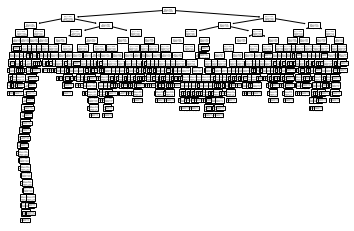

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create a decision tree - set whichever arguments you want set
clf = DecisionTreeClassifier(criterion='entropy')
# Train it
clf = clf.fit(pcaTrain, y_train)
tree.plot_tree(clf)
# The trained tree is now stored in the variable 'clf'

In [182]:
from sklearn.metrics import accuracy_score
preds = clf.predict(pcaTest)
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))

Accuracy on test data is: 0.9980671395488777
